# Credit Card Fraud Detection
-----



## Outline
---

<a href='#1'>I. Giới thiệu bài toán</a>
- <a href='#1-1'>1. Thông tin tổng quan dữ liệu </a> 
- <a href='#1-2'>2. PCA </a> 
- <a href='#1-3'>3. Metric đánh giá </a>

<a href='#2'>II. Giới thiệu dữ liệu</a>
- <a href='#2-1'>1. Thông tin tổng quan dữ liệu </a> 
- <a href='#2-2'>2. Thông tin tổng quan target </a> 
- <a href='#2-3'>3. Quan sát phân bố các trường dữ liệu </a>
    
<a href='#3'>III. Tiền xử lý và Khai phá dữ liệu</a>  
- <a href='#3-1'>1. Random Undersampling</a> 
- <a href='#3-1'>2. Correlation matrix & phân phối trường - target</a> 
    
<a href='#4'>IV. Feature engineering </a>
- <a href='#4-1'>3.1. Scaling   </a>
- <a href='#4-2'>3.2. Train and validation của imbalanced data </a> 
- <a href='#4-3'>3.3. Xử lý dữ liệu phân loại: Chuẩn hoá, đưa về phân phối chuẩn </a>   
- <a href='#4.4'>3.4. Xây dựng mô hình </a>
- <a href='#4.5'>3.5. Training  </a>
    
<a href='#5'>V. Tìm hiểu về SMOTE Technique (Over-Sampling) (Sơn) </a>







# <a id='1'>I. Giới thiệu về bài toán</a>
---

## <a id='1-1'> 1. Chọn metric đánh giá</a> 

**Ứng dụng mô hình:** Giúp các công ty thẻ tín dụng nhận diện giao dịch gian lận để bảo vệ khách hàng.

**Tổng quan dữ liệu:** Các giao dịch thẻ tín dụng của khách hàng Châu Âu trong vòng 2 ngày T9/2013. 

Có tổng cộng 492/284.807 (0.172%) giao dịch là gian lận. Dữ liệu chỉ bao gồm số đã được chuyển đổi theo phương pháp PCA. Vì lí do bảo mật nên các thông tin gốc không được phép công bố. Các features V1, V2…V27 được chuyển đổi bởi PCA, những dữ liệu duy nhất không bị chuyển đổi là `Time` và `Amount`. Feature `Time` là số giây kể từ giao dịch đầu tiên trong dataset. Feature `Amount` là giá trị giao dịch (coi như đơn vị là Euros), feature này có thể được dùng cho example-dependant cost-sensitive learning. Feature `Class` là đối tượng cần tìm, mang giá trị 1 nếu là giả mạo, còn lại mang giá trị 0. 

Do phân loại dữ liệu có tỉ lệ quá chênh lệch, nên kiểm tra độ chính xác bằng phương pháp AUPRC (Area Under the Precision-Recall Curve). 

## <a id='1-2'> 2. Sử dụng biến đổi PCA để che dấu dữ liệu </a> 

Những trường thông tin liên quan đến thông tin cá nhân của khách hàng có thể bị lợi dụng bởi các bên thứ ba, gây ra những nguy cơ mất an toàn và riêng tư cho người dùng. 

Giải pháp đơn giản là không cung cấp những thông tin nhạy cảm này cho các bên thứ ba, tuy nhiên trong những bài toán như nhận diện gian lận tín dụng, chúng có thể là những trường cần thiết, có quyết định rất lớn đến độ chính xác của mô hình. Một trong những phương pháp hiệu quả để che dấu những thông tin nhạy cảm là sử dụng **phép phân tích thành phần chính** (Principal Components Analysis - PCA).

PCA phân tách các chiều không gian - các thành phần chính chứa đựng nhiều thông tin nhất của dữ liệu. Ví dụ của một thành phần chính mà PCA tìm ra có thể là như sau - một tổ hợp tuyến tính của các dữ liệu input:
$$\text{V1} = 4 \times \text{TRANSACTION_ID} - \frac{3}{4} \times \text{TERMINAL_ID} + \frac{1}{2} \times \text{CUSTOMER_ID}$$

Mỗi một giao dịch có một giá trị `V1` và trường `V1` sẽ lưu giữ một phần độ phân tán của dữ liệu - có ý nghĩa trong khi đưa vào các mô hình học máy. Các trường dữ liệu `V1` đến `V28` trong dữ liệu của bài toán này chính là $28$ thành phần chính của phép PCA.

Chỉ từ các trường này thì rất khó khôi phục lại được các dữ liệu ban đầu nhưng các mô hình hoàn toàn có thể được huấn luyện tốt trên các dữ liệu được biến đổi này.

## <a id='1.3'> 3. Chọn metric đánh giá  </a> 

**Tại sao dùng AUC thay vì Accuracy cho Imbalanced data?**

Nhắc lại định nghĩa về Accurracy: $\text{Acuracy} = \dfrac{\text{True positives + True negatives} }{\text{True  positives  +  False  positives + True negatives + False negatives}}$
 

Theo đó, với imbalanced data, khi mà kết quả nghiêng hẳn về 0 hay 1 thì dùng accuracy sẽ không thể đo chính xác mức độ hiệu quả của model (trong trường hợp này là 0.17% kết quả là 1) vì dù model có ra toàn là 0 hay 1 thì accuracy vẫn cho ra kết quả rất tốt.

Với AUC, khi kết quả gần về đến 1 thì nghĩa là model perform càng tốt, ở 0.5 thì kết quả không khác gì tung đồng xu, và tiến về 0 thì model sẽ dự đoán 0 thành 1 và ngược lại.

Hơn nữa, những giá trị được dự đoán sai (False Positives, False Negatives) sẽ có ảnh hưởng lớn hơn đến AUC. Đây là điều mà chúng ta quan tâm khi làm việc với imbalanced data.

Có thể dùng f1 score, confusion matric, precision/recall score tùy thuộc vào độ ưu tiên của model.

**Average Precision hay Area Under the Precision-Recall Curve:**

- Precision-Recall curve thể hiện giá trị Recall và Precision với thresholds $t$ khác nhau như là Recall và Sensitivity của ROC curve.

- Precision Recall Curve có những tính chất khác ROC:

    - Precision có thể tăng hoặc giảm khi Recall tăng (Tăng khi gặp True Positives và giảm với False Positives).

    - Độ hiểu quả của của một random classifier phụ thuộc vào mức độ mất cân bằng của tập dữ liệu. 


### Nhập các gói thư viện

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as im_Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
import sklearn.metrics as metrics
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

### Đọc file dữ liệu

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

# <a id='2'>II. Giới thiệu về data</a>
---

## 1. Thông tin tổng quan dữ liệu

In [3]:
print('Kích thước: %d hàng, %d cột' %df.shape)
print()
df.head()

Kích thước: 284807 hàng, 31 cột



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Thông tin các trường dữ liệu:
- `Time`: Số giây giữa mỗi giao dịch với giao dịch đầu tiên trong dataset
- `Amount`: Số tiền giao dịch
- `Class`: Nhận giá trị 1 nếu là giao dịch gian lận, 0 là bình thường
- `V1`-`V28`: Các thành phần chính (principal components) của dataset, kết quả của phép biến đổi PCA.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Loại bỏ các dòng trùng lặp

In [5]:
duplicated = df[df.duplicated()]
duplicated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [6]:
df.drop(duplicated.index, axis=0, inplace=True)
print('Kích thước sau khi bỏ hàng lặp: %d hàng, %d cột' %df.shape)

Kích thước sau khi bỏ hàng lặp: 283726 hàng, 31 cột


### Kiểm tra dữ liệu thiếu

In [7]:
print(f'Output True nếu có missing data: {df.isnull().any().any()}') 

Output True nếu có missing data: False


## 2. Thông tin tổng quan target
### Tính mất cân bằng của tập dữ liệu (Imbalanced dataset)

In [8]:
no_class_0 = df['Class'].value_counts()[0]
no_class_1 = df['Class'].value_counts()[1]
print(f"{no_class_0} giao dịch bình thường chiếm {round(no_class_0/len(df) * 100,2)}% dữ liệu")
print(f"{no_class_1} giao dịch gian lận chiếm {round(no_class_1/len(df) * 100,2)}% dữ liệu")

283253 giao dịch bình thường chiếm 99.83% dữ liệu
473 giao dịch gian lận chiếm 0.17% dữ liệu


Text(0.5, 1.0, 'Phân bố loại giao dịch \n (0: Bình thường || 1: Gian lận)')

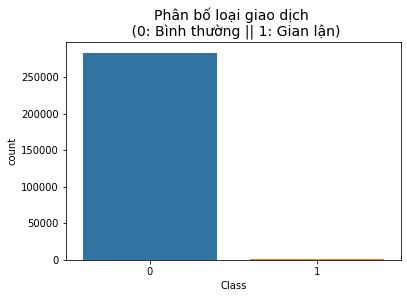

In [9]:
sns.countplot('Class', data=df)
plt.title('Phân bố loại giao dịch \n (0: Bình thường || 1: Gian lận)', fontsize=14)

**Nhận xét:** 
- Có thể thấy trường Target rất mất cân bằng. Hầu hết các giao dịch trong tập dữ liệu là bình thường!
- Nếu sử dụng trực tiếp tập dữ liệu này để xây dựng mô hình dự đoán sẽ xảy ra tình trạng overfit khi nó sẽ mặc định hầu hết các giao dịch là bình thường và không có ý nghĩa nhận diện tính bất thường của một giao dịch.

Một kĩ thuật để xử lý tình trạng sẽ được sử dụng trong bài này là **Under-Sampling** - ngẫu nhiên lược bỏ các giao dịch bình thường để tạo một tập dữ liệu nhỏ hơn với tỉ lệ của hai loại giao dịch là 50/50.

## 3. Quan sát phân bố các trường dữ liệu

### Phân bố các trường V1-V28

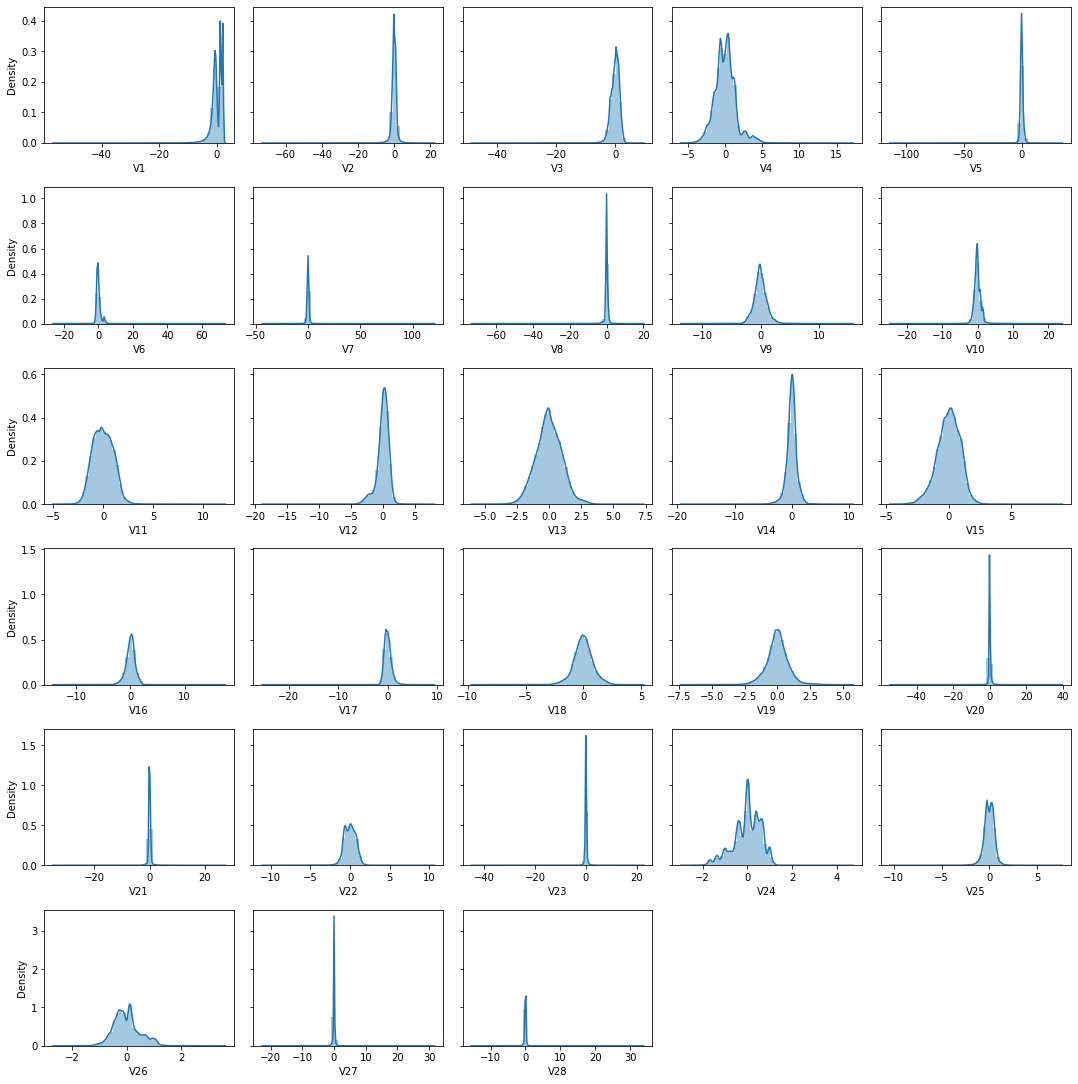

In [10]:
fig, ax = plt.subplots(ncols=5, nrows=6, figsize=(15,15), sharey='row')
index = 0
ax = ax.flatten()

for col in df.columns.values:
    if col not in ['Time', 'Amount', 'Class']:
        sns.distplot(df[col], ax=ax[index])
        index += 1
ax[28].set_visible(False)
ax[29].set_visible(False)
plt.tight_layout(pad=0.5, w_pad=1.0, h_pad=1.0)

### Phân bố trường Time và Amount

(0.0, 172792.0)

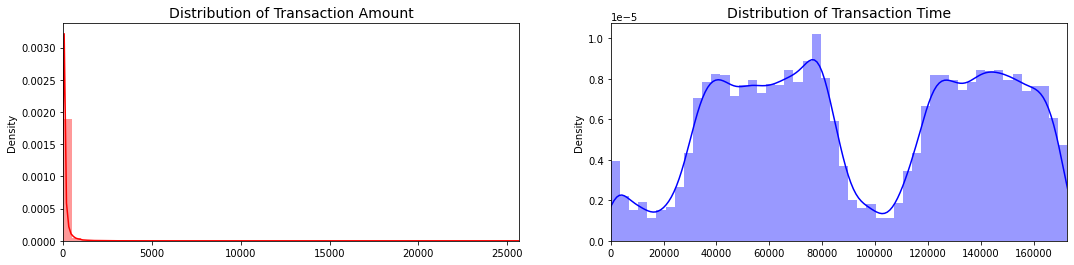

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

### Phân bố các trường - Target

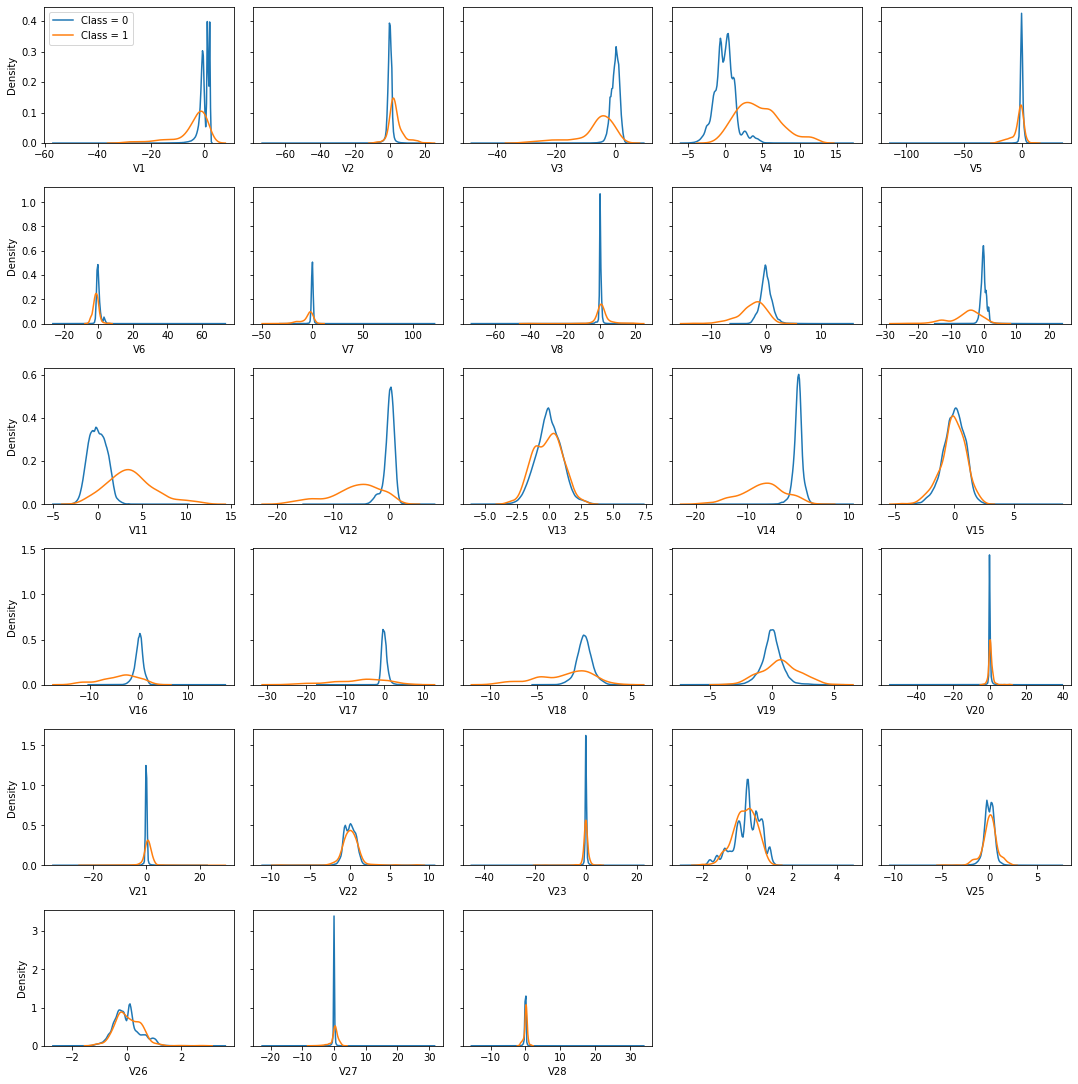

In [12]:
fig, ax = plt.subplots(ncols=5, nrows=6, figsize=(15,15), sharey='row')
index = 0
ax = ax.flatten()

for col in df.columns:
    if col not in ['Time', 'Amount', 'Class']:
        sns.kdeplot(df.loc[df['Class'] == 0, col] , label = 'Class = 0', ax=ax[index])
        sns.kdeplot(df.loc[df['Class'] == 1, col] , label = 'Class = 1', ax=ax[index])
        index += 1
ax[0].legend()
ax[28].set_visible(False)
ax[29].set_visible(False)
plt.tight_layout(pad=0.5, w_pad=1.0, h_pad=1.0)

### Phân bố Time Amount - Target

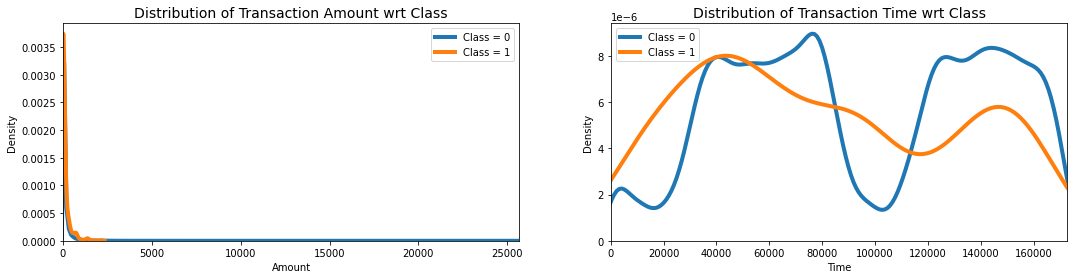

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.kdeplot(df.loc[df['Class'] == 0, 'Amount'] , label = 'Class = 0', ax=ax[0], linewidth=4)
sns.kdeplot(df.loc[df['Class'] == 1, 'Amount'] , label = 'Class = 1', ax=ax[0], linewidth=4)
ax[0].legend()
ax[0].set_title('Distribution of Transaction Amount wrt Class', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.kdeplot(df.loc[df['Class'] == 0, 'Time'] , label = 'Class = 0', ax=ax[1], linewidth=4)
sns.kdeplot(df.loc[df['Class'] == 1, 'Time'] , label = 'Class = 1', ax=ax[1], linewidth=4)
ax[1].legend()
ax[1].set_title('Distribution of Transaction Time wrt Class', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

# <a id='3'>III. Thử nghiệm</a>
---

## 1. Chia dữ liệu Train và Test

Ta sẽ sẽ chia tập dữ liệu gốc ra thành tập train và test dùng để huấn luyện mô hình và kiểm tra hiệu năng của nó. Tập train và test vẫn giữ phân phối ban đầu của Target.

In [14]:
from sklearn.model_selection import train_test_split

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the dataset')

X = df.copy()

X_train = X.loc[X.Time < 100000]
X_test = X.loc[X.Time >= 100000]
y_train = X_train.pop('Class')
y_test = X_test.pop('Class')

No Frauds 99.833 % of the dataset
Frauds 0.167 % of the dataset


In [15]:
print('-' * 100)

print('Train-Test Ratio: \n')
print('Train:', len(y_train)/ (len(y_train)+len(y_test)))
print('Test:', len(y_test)/ (len(y_train)+len(y_test)))

----------------------------------------------------------------------------------------------------
Train-Test Ratio: 

Train: 0.5398342062412327
Test: 0.46016579375876726


In [16]:
train_unique_label, train_counts_label = np.unique(y_train.values, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test.values, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99796298 0.00203702]
[0.99876686 0.00123314]


## 2. Baseline Feature Transformer
- Scaling trường `Time` và `Amount` dùng StandardScaler và RobustScaler
- Thực hiện Random Under-sampling 

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
from imblearn.under_sampling import RandomUnderSampler 

preprocessor = ColumnTransformer([('std_scaler', StandardScaler(), ['Time']),
                           ('rob_scaler', RobustScaler(), ['Amount'])],
                           remainder='passthrough')

## 3. Xây dựng Framework để so sánh các mô hình

- Hàm `fit_model_and_get_predictions` huấn luận mô hình với các dữ liệu đưa vào và trả về các kết quả dự đoán trên tập Train vả Test, thời gian huấn luyện và thời gian dự đoán.
- Hàm `performance_assessment` trả về điểm AOC và AP của kết quả dự đoán của một mô hình trên tập Train hoặc Test.
- Hàm `execution_times_model_collection` trả về thời gian huấn luyện (Training Execution time) và thời gian dự đoán (Prediction execution time).

In [18]:
def fit_model_and_get_predictions(model, train_df, train_target, test_df):
    
    # Huấn luyện mô hình trên tập các tập train
    start_time=time.time()
    model.fit(train_df, train_target)
    training_execution_time=time.time()-start_time

    # Lấy kết quả dự đoán trên tập train và tập test
    # Kết quả dự đoán là một numpy array với các phần tử là xác suất một giao dịch là giao dịch gian lận
    start_time = time.time()
    predictions_test = model.predict_proba(test_df)[:,1]
    prediction_execution_time = time.time() - start_time
    
    predictions_train = model.predict_proba(train_df)[:,1]

    # Trả về dictionary chứa mô hình đã được huấn luyện, các kết quả dự đoán và thời gian chạy
    model_and_predictions_dictionary = {'classifier': classifier,
                                        'predictions_test': predictions_test,
                                        'predictions_train': predictions_train,
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                       }
    
    return model_and_predictions_dictionary

In [19]:
def performance_assessment(y_true, y_pred, rounded=True):
    # Lấy 2 điểm số AUC ROC và Average Precision
    AUC_ROC = metrics.roc_auc_score(y_true, y_pred)
    AP = metrics.average_precision_score(y_true, y_pred)
    
    # Tạo một DataFrame chứa các điểm số
    performances = pd.DataFrame([[AUC_ROC, AP]], 
                           columns=['AUC ROC','Average precision'])
    
    # Làm tròn kết quả
    if rounded:
        performances = performances.round(3)
    
    return performances

In [20]:
def execution_times_model_collection(fitted_models_and_predictions_dictionary):

    execution_times=pd.DataFrame() 
    
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
    
        execution_times_model=pd.DataFrame() 
        execution_times_model['Training execution time']=[model_and_predictions['training_execution_time']]
        execution_times_model['Prediction execution time']=[model_and_predictions['prediction_execution_time']]
        execution_times_model.index=[classifier_name]
        
        execution_times=execution_times.append(execution_times_model)
        
    return execution_times

In [21]:
def performance_assessment_model_collection(fitted_models_and_predictions_dictionary, 
                                            type_set='test'):

    performances=pd.DataFrame() 
    
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
        if type_set == 'test':
            performances_model=performance_assessment(y_test,  model_and_predictions['predictions_test'])
            performances_model.index=[classifier_name]
        elif type_set == 'train':
            performances_model=performance_assessment(y_train,  model_and_predictions['predictions_train'])
            performances_model.index=[classifier_name]
        else:
            raise ValueError("invalid type_set")
                
        performances=performances.append(performances_model)
        
    return performances

In [22]:
def execution_times_model_collection(fitted_models_and_predictions_dictionary):

    execution_times=pd.DataFrame() 
    
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
    
        execution_times_model=pd.DataFrame() 
        execution_times_model['Training execution time']=[model_and_predictions['training_execution_time']]
        execution_times_model['Prediction execution time']=[model_and_predictions['prediction_execution_time']]
        execution_times_model.index=[classifier_name]
        
        execution_times=execution_times.append(execution_times_model)
        
    return execution_times

### Hyper-parameters tuning

- Hàm `kfold_score` trả về điểm AP trung bình khi thực hiện Stratified K-folds Cross Validation.

In [23]:
def kfold_score(X, y, model, scoring='average_precision'):
    scores = cross_val_score(model, X, y, scoring=scoring)
    return scores.mean()

- Chọn các bộ tham số cho các mô hình `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier` và `XGBClassifier` sử dụng thư viện Optuna.

In [24]:
import optuna

In [25]:
def objective(trial):
    lr_params = dict(
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2']),
        C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    )
    clf = LogisticRegression(random_state=42, solver='saga', **lr_params)
    model = im_Pipeline([('preprocess', preprocess),
                         ('estimator', clf)])
    return kfold_score(X_train, y_train, model)
    
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)
# lr_params = study.best_params

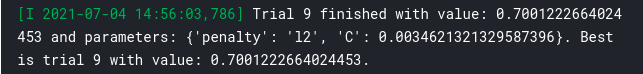

In [26]:
lr_params = {'penalty': 'l2', 'C': 0.0034621321329587396}

In [27]:
def objective(trial):
    dt_params = dict(
        criterion = trial.suggest_categorical('criterion', ["gini", "entropy"]),
        max_depth = trial.suggest_int('max_depth', 2, 4),
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 7)
    )
    clf = DecisionTreeClassifier(random_state=42, **dt_params)
    model = im_Pipeline([('preprocess', preprocess),
                         ('estimator', clf)])
    return kfold_score(X_train, y_train, model)
    
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)
# dt_params = study.best_params

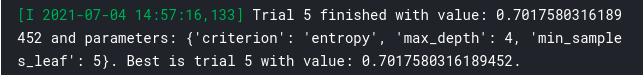

In [28]:
dt_params = {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}

In [29]:
def objective(trial):
    rf_params = dict(
        max_depth = trial.suggest_int('max_depth', 2, 10),
        n_estimators = trial.suggest_int('n_estimators', 100, 800),
    )
    clf = RandomForestClassifier(random_state=42, **rf_params)
    model = im_Pipeline([('preprocess', preprocess),
                         ('estimator', clf)])
    return kfold_score(X_train, y_train, clf)
    
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)
# rf_params = study.best_params

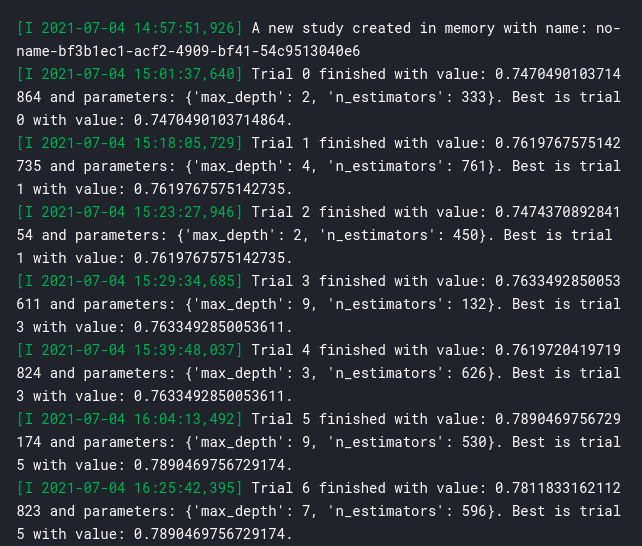
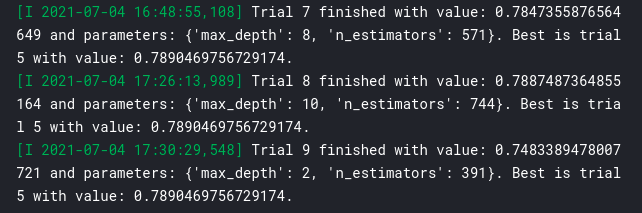

In [30]:
rf_params = {'max_depth': 9, 'n_estimators': 530}

In [31]:
def objective(trial):
    xgb_params = dict(
        max_depth = trial.suggest_int('max_depth', 2, 10),
        n_estimators = trial.suggest_int('n_estimators', 100, 1000),
        learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True)
    )
    clf = XGBClassifier(random_state=42, **xgb_params)
    model = im_Pipeline([('preprocess', preprocess),
                         ('estimator', clf)])
    return kfold_score(X_train, y_train, clf)
    
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)
# xgb_params = study.best_params

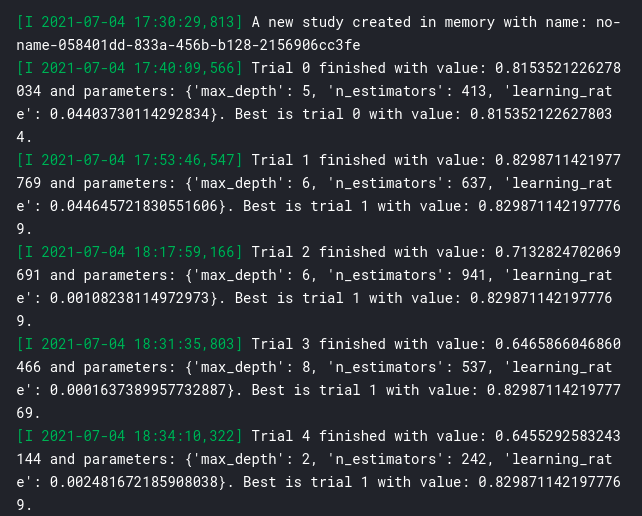
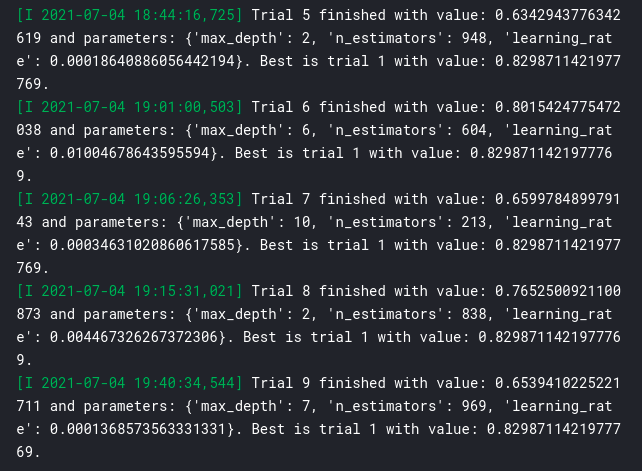

In [32]:
xgb_params = {'max_depth': 6, 'n_estimators': 604, 'learning_rate': 0.044645721830551606}

In [33]:
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, **lr_params),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42, **dt_params),
    "Random Forest": RandomForestClassifier(random_state=42, **rf_params),
    "XGBoost": XGBClassifier(random_state=42, **xgb_params)
}

#### Bảng 1: Hiệu năng của bốn mô hình Logistic Regression, Decision Tree, Random Forest và XGBoost.

In [34]:
fitted_models_and_predictions_dictionary = {}

for classifier_name, classifier in classifiers.items():
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    model_and_predictions = fit_model_and_get_predictions(model, X_train, y_train, X_test)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

[07:35:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='test')
df_performances

,AUC ROC,Average precision
Logistic Regression,0.976,0.717
Decision Tree Classifier,0.914,0.549
Random Forest,0.983,0.780
XGBoost,0.981,0.768


In [36]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='train')
df_performances

,AUC ROC,Average precision
Logistic Regression,0.984,0.744
Decision Tree Classifier,0.973,0.803
Random Forest,1.000,0.973
XGBoost,1.000,1.000


In [37]:
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
Logistic Regression,1.450286,0.056167
Decision Tree Classifier,5.380158,0.043389
Random Forest,510.095323,4.752296
XGBoost,257.468408,0.882180


#### Bảng 2: Hiệu năng của bốn mô hình Logistic Regression, Decision Tree, Random Forest và XGBoost khi sử dụng Random Under Sampling.

In [38]:
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler(random_state=42)

fitted_models_and_predictions_dictionary = {}

for classifier_name, classifier in classifiers.items():
    model = im_Pipeline([
        ('preprocessor', preprocessor),
        ('under', under),
        ('classifier', classifier)
    ])
    model_and_predictions = fit_model_and_get_predictions(model, X_train, y_train, X_test)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

[07:40:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='test')
df_performances

,AUC ROC,Average precision
Logistic Regression,0.981,0.650
Decision Tree Classifier,0.928,0.024
Random Forest,0.986,0.786
XGBoost,0.979,0.687


In [40]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='train')
df_performances

,AUC ROC,Average precision
Logistic Regression,0.984,0.702
Decision Tree Classifier,0.980,0.089
Random Forest,1.000,0.914
XGBoost,1.000,0.915


In [41]:
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
Logistic Regression,0.126015,0.069500
Decision Tree Classifier,0.169028,0.046041
Random Forest,1.689027,5.139237
XGBoost,0.926935,0.518470


#### Bảng 3: Hiệu năng của bốn mô hình Logistic Regression, Decision Tree, Random Forest và XGBoost khi sử dụng Random Over Sampling.

In [42]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=42)

fitted_models_and_predictions_dictionary = {}

for classifier_name, classifier in classifiers.items():
    model = im_Pipeline([
        ('preprocessor', preprocessor),
        ('over', over),
        ('classifier', classifier)
    ])
    model_and_predictions = fit_model_and_get_predictions(model, X_train, y_train, X_test)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

[07:51:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='test')
df_performances

,AUC ROC,Average precision
Logistic Regression,0.971,0.726
Decision Tree Classifier,0.891,0.611
Random Forest,0.982,0.780
XGBoost,0.975,0.788


In [44]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='train')
df_performances

,AUC ROC,Average precision
Logistic Regression,0.987,0.719
Decision Tree Classifier,0.990,0.729
Random Forest,1.000,0.988
XGBoost,1.000,1.000


In [45]:
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
Logistic Regression,4.385766,0.064802
Decision Tree Classifier,6.770801,0.045798
Random Forest,610.319432,5.254426
XGBoost,421.066498,0.810160


#### Bảng 4: Hiệu năng của bốn mô hình Logistic Regression, Decision Tree, Random Forest và XGBoost khi sử dụng SMOTE.

In [46]:
from imblearn.over_sampling import SMOTE
over=SMOTE(random_state=42)

fitted_models_and_predictions_dictionary = {}

for classifier_name, classifier in classifiers.items():
    model = im_Pipeline([
        ('preprocessor', preprocessor),
        ('over', over),
        ('classifier', classifier)
    ])
    model_and_predictions = fit_model_and_get_predictions(model, X_train, y_train, X_test)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

[08:16:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='test')
df_performances

,AUC ROC,Average precision
Logistic Regression,0.970,0.733
Decision Tree Classifier,0.922,0.608
Random Forest,0.979,0.757
XGBoost,0.961,0.789


In [48]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='train')
df_performances

,AUC ROC,Average precision
Logistic Regression,0.986,0.715
Decision Tree Classifier,0.986,0.719
Random Forest,1.000,0.971
XGBoost,1.000,1.000


In [49]:
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
Logistic Regression,4.954973,0.071588
Decision Tree Classifier,11.789404,0.045674
Random Forest,1047.220432,6.882825
XGBoost,706.060990,0.829083


#### Bảng 5: Hiệu năng của bốn mô hình EasyEnsemble, RUSBoost, Balanced Bagging và Balanced Random Forest.

In [50]:
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
ensembles = {
    'EasyEnsemble': EasyEnsembleClassifier(random_state=42),
    'RUSBoost': RUSBoostClassifier(random_state=42),
    'BalancedBagging': BalancedBaggingClassifier(random_state=42),
    'BalancedRandomForest': BalancedRandomForestClassifier(random_state=42)
}

In [51]:
fitted_models_and_predictions_dictionary = {}

for classifier_name, classifier in ensembles.items():
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    model_and_predictions = fit_model_and_get_predictions(model, X_train, y_train, X_test)
    fitted_models_and_predictions_dictionary[classifier_name]=model_and_predictions

In [52]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='test')
df_performances

,AUC ROC,Average precision
EasyEnsemble,0.970,0.739
RUSBoost,0.950,0.613
BalancedBagging,0.975,0.523
BalancedRandomForest,0.984,0.774


In [53]:
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary,
                                                        type_set='train')
df_performances

,AUC ROC,Average precision
EasyEnsemble,0.999,0.817
RUSBoost,0.996,0.661
BalancedBagging,0.999,0.708
BalancedRandomForest,1.000,0.816


In [54]:
df_execution_times=execution_times_model_collection(fitted_models_and_predictions_dictionary)
df_execution_times

,Training execution time,Prediction execution time
EasyEnsemble,3.840377,13.856055
RUSBoost,5.303441,1.425159
BalancedBagging,2.447678,0.340492
BalancedRandomForest,7.152107,1.123359


### Đường cong ROC và AP của các mô hình Ensembles

In [55]:
def get_template_roc_curve(ax, title,fs,random=True):
    
    ax.set_title(title, fontsize=fs)
    ax.set_xlim([-0.01, 1.01])
    ax.set_ylim([-0.01, 1.01])
    
    ax.set_xlabel('False Positive Rate', fontsize=fs)
    ax.set_ylabel('True Positive Rate', fontsize=fs)
    
    if random:
        ax.plot([0, 1], [0, 1],'r--',label="AUC ROC Random = 0.5")
        
def get_template_pr_curve(ax, title,fs, baseline=0.5):
    
    ax.set_title(title, fontsize=fs)
    ax.set_xlim([-0.01, 1.01])
    ax.set_ylim([-0.01, 1.01])
    
    ax.set_xlabel('Recall (True Positive Rate)', fontsize=fs)
    ax.set_ylabel('Precision', fontsize=fs)
    
    ax.plot([0, 1], [baseline, baseline],'r--',label='AP Random = {0:0.3f}'.format(baseline))

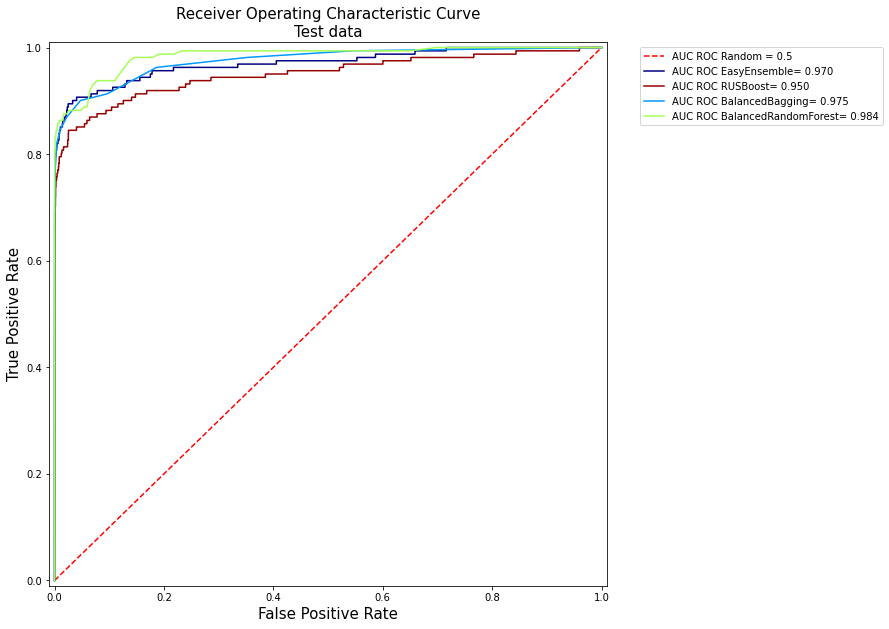

In [56]:
roc_curve, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={'EasyEnsemble':cmap(0), 
        'RUSBoost':cmap(250),
        'BalancedBagging':cmap(70), 
        'BalancedRandomForest':cmap(140)}

get_template_roc_curve(ax,title='Receiver Operating Characteristic Curve\nTest data',fs=15)
    
for classifier_name in ensembles:
    
    model_and_predictions=fitted_models_and_predictions_dictionary[classifier_name]

    FPR_list, TPR_list, threshold = metrics.roc_curve(y_test, model_and_predictions['predictions_test'])
    ROC_AUC = metrics.auc(FPR_list, TPR_list)

    ax.plot(FPR_list, TPR_list, 'b', color=colors[classifier_name], label = 'AUC ROC {0}= {1:0.3f}'.format(classifier_name,ROC_AUC))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))

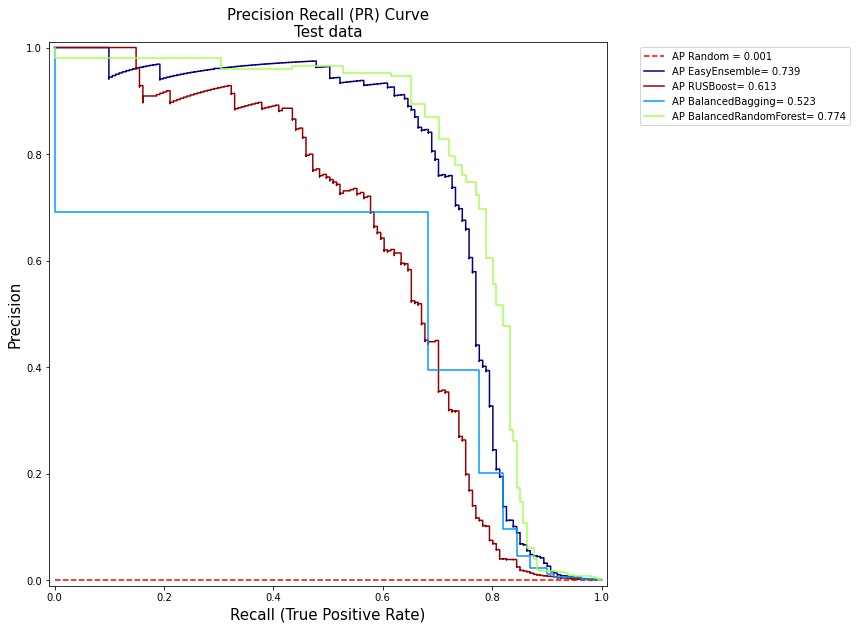

In [57]:
pr_curve, ax = plt.subplots(1, 1, figsize=(10,10))
cmap = plt.get_cmap('jet')
colors={'EasyEnsemble':cmap(0), 
        'RUSBoost':cmap(250),
        'BalancedBagging':cmap(70), 
        'BalancedRandomForest':cmap(140)}

get_template_pr_curve(ax, "Precision Recall (PR) Curve\nTest data",fs=15,baseline=sum(y_test/len(y_test)))
    
for classifier_name in ensembles:
    
    model_and_predictions=fitted_models_and_predictions_dictionary[classifier_name]

    precision, recall, threshold = metrics.precision_recall_curve(y_test, model_and_predictions['predictions_test'])
    precision=precision[::-1]
    recall=recall[::-1]
    
    AP = metrics.average_precision_score(y_test, model_and_predictions['predictions_test'])
    
    ax.step(recall, precision, 'b', color=colors[classifier_name], label = 'AP {0}= {1:0.3f}'.format(classifier_name,AP))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    
    
plt.subplots_adjust(wspace=0.5, hspace=0.8)